In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set(style="ticks", color_codes=True)

In [2]:
os.chdir('data')

In [3]:
df = pd.read_csv('train.csv',header=0,parse_dates=["Date"])
features = pd.read_csv('features.csv',header=0,parse_dates=["Date"])
stores = pd.read_csv('stores.csv',header=0)

In [4]:
df = df.merge(stores, how='left')
df = df.merge(features, how='left')
df.sample(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
202802,21,41,2010-02-12,2401.00,True,B,140167,37.77,2.548,NaN,NaN,NaN,NaN,NaN,210.897994,8.324
90521,10,23,2010-09-17,46748.33,False,B,126512,85.52,3.028,NaN,NaN,NaN,NaN,NaN,126.145467,9.199
35415,4,46,2010-02-26,33716.70,False,A,205863,41.36,2.590,NaN,NaN,NaN,NaN,NaN,126.552286,8.623
287464,30,7,2011-07-08,648.23,False,C,42988,89.16,3.480,NaN,NaN,NaN,NaN,NaN,214.929625,7.852
357843,38,49,2012-06-08,16.88,False,C,39690,84.83,4.103,491.31,NaN,11.8,NaN,1999.19,130.889677,11.627
48206,5,92,2011-06-10,7271.96,False,B,34875,83.61,3.648,NaN,NaN,NaN,NaN,NaN,215.606456,6.489
265748,27,90,2011-11-11,101027.43,False,A,204184,49.69,3.719,10710.56,44021.61,475.3,4235.07,4920.65,140.411161,7.906
207766,22,5,2011-04-22,31045.69,False,B,119557,47.76,3.919,NaN,NaN,NaN,NaN,NaN,138.247504,8.252
265373,27,85,2010-02-26,3411.30,False,A,204184,36.00,2.910,NaN,NaN,NaN,NaN,NaN,135.519519,8.237
325781,34,40,2010-10-22,41453.09,False,A,158114,58.11,2.736,NaN,NaN,NaN,NaN,NaN,126.381548,10.210


In [5]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Weekly_Sales'], marker='.', c='r')
    plt.ylabel('weeklySales')
    plt.xlabel(column)

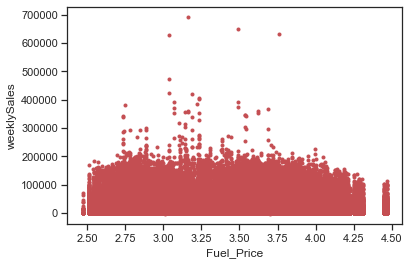

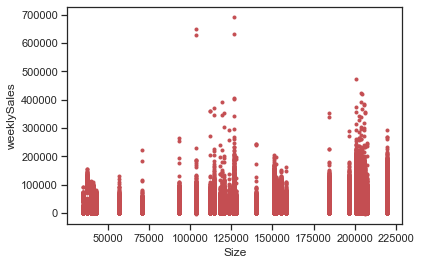

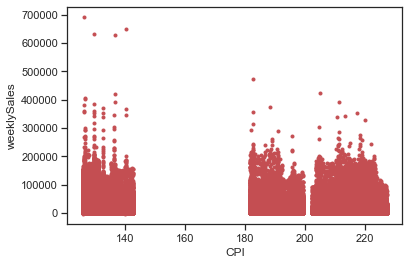

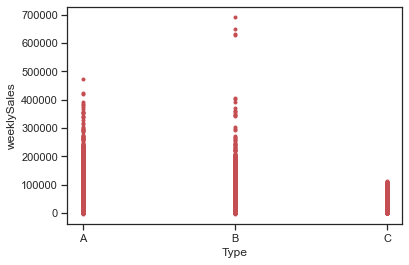

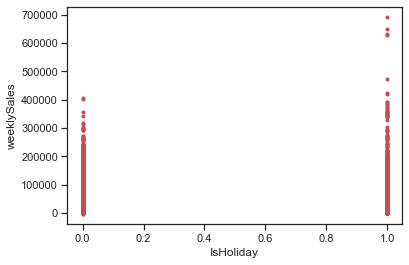

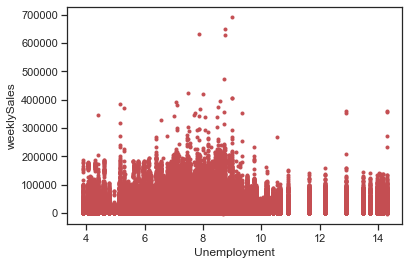

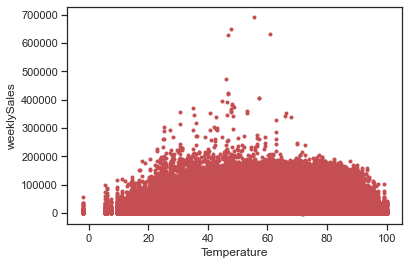

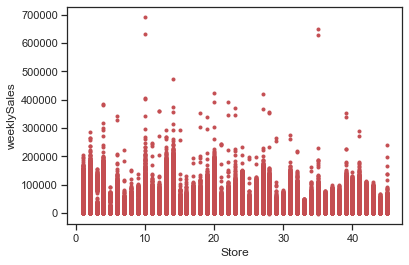

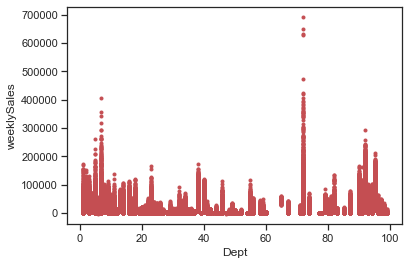

In [6]:
scatter(df, 'Fuel_Price')
scatter(df, 'Size')
scatter(df, 'CPI')
scatter(df, 'Type')
scatter(df, 'IsHoliday')
scatter(df, 'Unemployment')
scatter(df, 'Temperature')
scatter(df, 'Store')
scatter(df, 'Dept')

In [7]:
#df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week']=df['Date'].dt.week
df['Day']=df['Date'].dt.day

df['n_days'] = (df['Date'].dt.date - df['Date'].dt.date.min()).apply(lambda x: x.days)

In [9]:
train = df.copy()
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day,n_days
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,...,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5,0
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,...,NaN,NaN,NaN,211.242170,8.106,2010,2,6,12,7
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,...,NaN,NaN,NaN,211.289143,8.106,2010,2,7,19,14
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,...,NaN,NaN,NaN,211.319643,8.106,2010,2,8,26,21
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,...,NaN,NaN,NaN,211.350143,8.106,2010,3,9,5,28


In [10]:
Year=pd.Series(train['Year'].unique())
Week=pd.Series(train['Week'].unique())
Month=pd.Series(train['Month'].unique())
Day=pd.Series(train['Day'].unique())
n_days=pd.Series(train['n_days'].unique())

In [11]:
print('Year=',sorted(Year))
print('Month=',sorted(Month))
print('Week=',sorted(Week))
print('Day=',sorted(Day))
print('n_days=',sorted(n_days))

Year= [2010, 2011, 2012]
Month= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Week= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
Day= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
n_days= [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175, 182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266, 273, 280, 287, 294, 301, 308, 315, 322, 329, 336, 343, 350, 357, 364, 371, 378, 385, 392, 399, 406, 413, 420, 427, 434, 441, 448, 455, 462, 469, 476, 483, 490, 497, 504, 511, 518, 525, 532, 539, 546, 553, 560, 567, 574, 581, 588, 595, 602, 609, 616, 623, 630, 637, 644, 651, 658, 665, 672, 679, 686, 693, 700, 707, 714, 721, 728, 735, 742, 749, 756, 763, 770, 777, 784, 791, 798, 805, 812, 819, 826, 833, 840, 847,

In [12]:
print(stores.head())

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [13]:
grouped = stores.groupby('Type')
grouped.describe()['Size'].round(2)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


In [14]:
train.shape

(421570, 21)

[48.888888888888886, 37.77777777777778, 13.333333333333334]


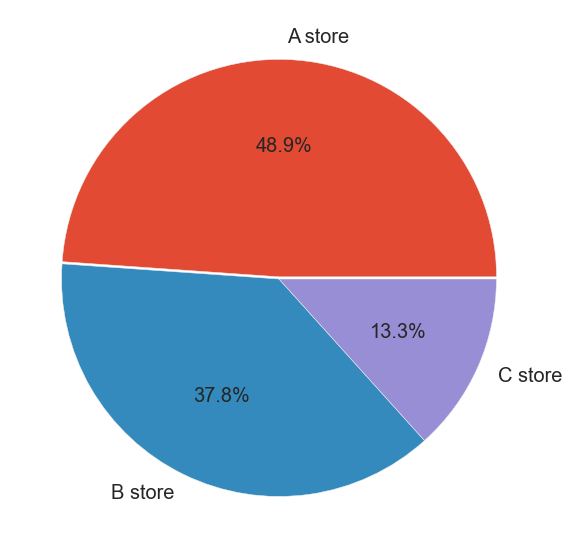

In [15]:
plt.style.use('ggplot')
labels=['A store','B store','C store']
sizes=grouped.describe()['Size'].round(1)
total_ = 17+6+22
sizes=[(22/(total_))*100,(17/(total_))*100,(6/(total_))*100] # convert to the proportion
print(sizes)

fig, axes = plt.subplots(figsize=(10,10))

wprops={'edgecolor':'black',
      'linewidth':2}

tprops = {'fontsize':20}

axes.pie(sizes,
        labels=labels,
        explode=(0.01,0,0),
        autopct='%1.1f%%',
        #pctdistance=0.6,
        #labeldistance=1.2,
        #wedgeprops=wprops,
        textprops=tprops,
        #radius=0.8,
        #center=(0.5,0.5)
        )
plt.show()

In [16]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


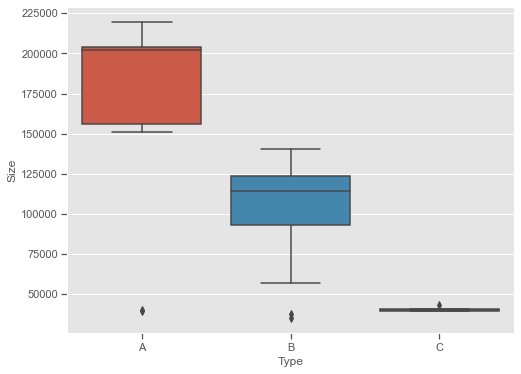

In [17]:
data = pd.concat([stores['Type'], stores['Size']], axis=1)

f, ax = plt.subplots(figsize=(8,6))

fig = sns.boxplot(x='Type', y='Size', data=data)

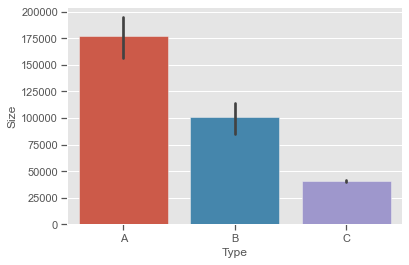

In [18]:
fig = sns.barplot(x='Type', y='Size', data=data)

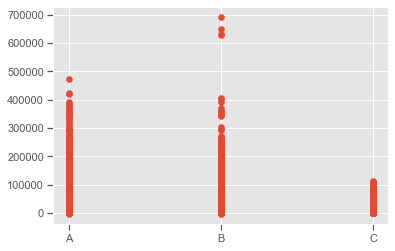

In [19]:
plt.scatter(train['Type'],train['Weekly_Sales'])

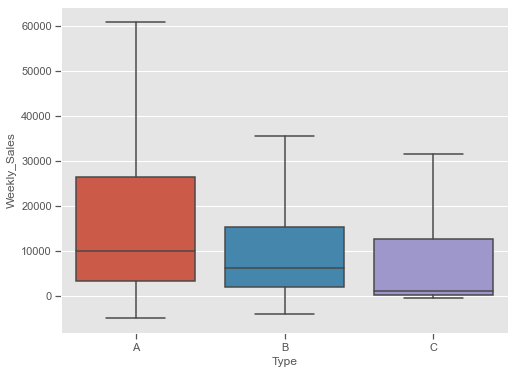

In [20]:
data = pd.concat([train['Type'], train['Weekly_Sales']], axis=1)

f,ax = plt.subplots(figsize=(8,6))

fig = sns.boxplot(x='Type', y='Weekly_Sales', data=data, showfliers=False)

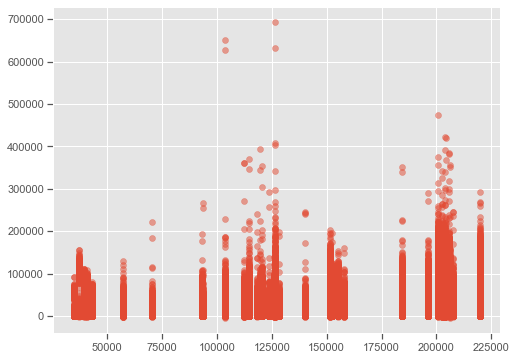

In [21]:
plt.style.use('ggplot')

f,ax = plt.subplots(figsize=(8,6))

plt.scatter(train['Size'], train['Weekly_Sales'], alpha=0.5)

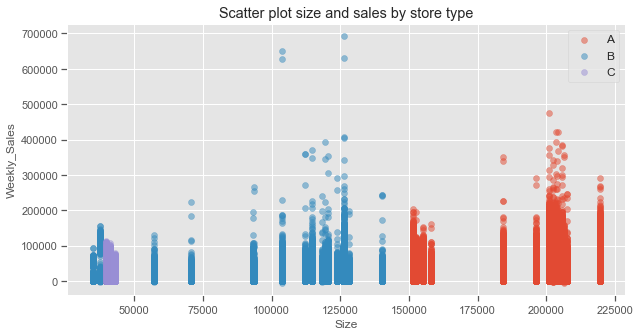

In [22]:
types = stores['Type'].unique()

plt.style.use('ggplot')

f, ax = plt.subplots(figsize=(10,5))

for t in types:
    x = train.loc[train['Type']==t, 'Size']
    y = train.loc[train['Type']==t, 'Weekly_Sales']
    plt.scatter(x,y,alpha=0.5,label=t)

plt.title('Scatter plot size and sales by store type')
plt.xlabel('Size')
plt.ylabel('Weekly_Sales')
plt.legend(fontsize=12)
plt.show()

In [23]:
## ========>>>>>>

In [24]:
A = train.groupby('Type').sum()['Weekly_Sales']['A']
B = train.groupby('Type').sum()['Weekly_Sales']['B']
C = train.groupby('Type').sum()['Weekly_Sales']['C']

In [25]:
A, B , C

(4331014722.750051, 2000700736.8200703, 405503527.5399986)

In [26]:
D = A+B+C

(A/D)*100, (B/D)*100, (C/D)*100

(64.28490347480611, 29.69624025355091, 6.0188562716429725)

In [27]:
A > B, A > C, B > C

(True, True, True)

In [28]:
## ========<<<<<<

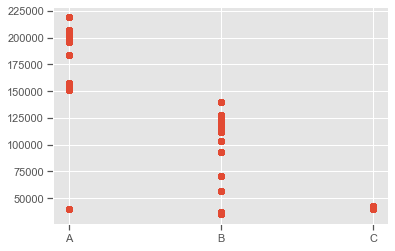

In [29]:
plt.scatter(train['Type'],train['Size'])

In [30]:
train['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [31]:
data = pd.concat([train['Store'],train['Weekly_Sales'],train['Type']],axis='columns')
data.head(2)

,Store,Weekly_Sales,Type
0,1,24924.50,A
1,1,46039.49,A


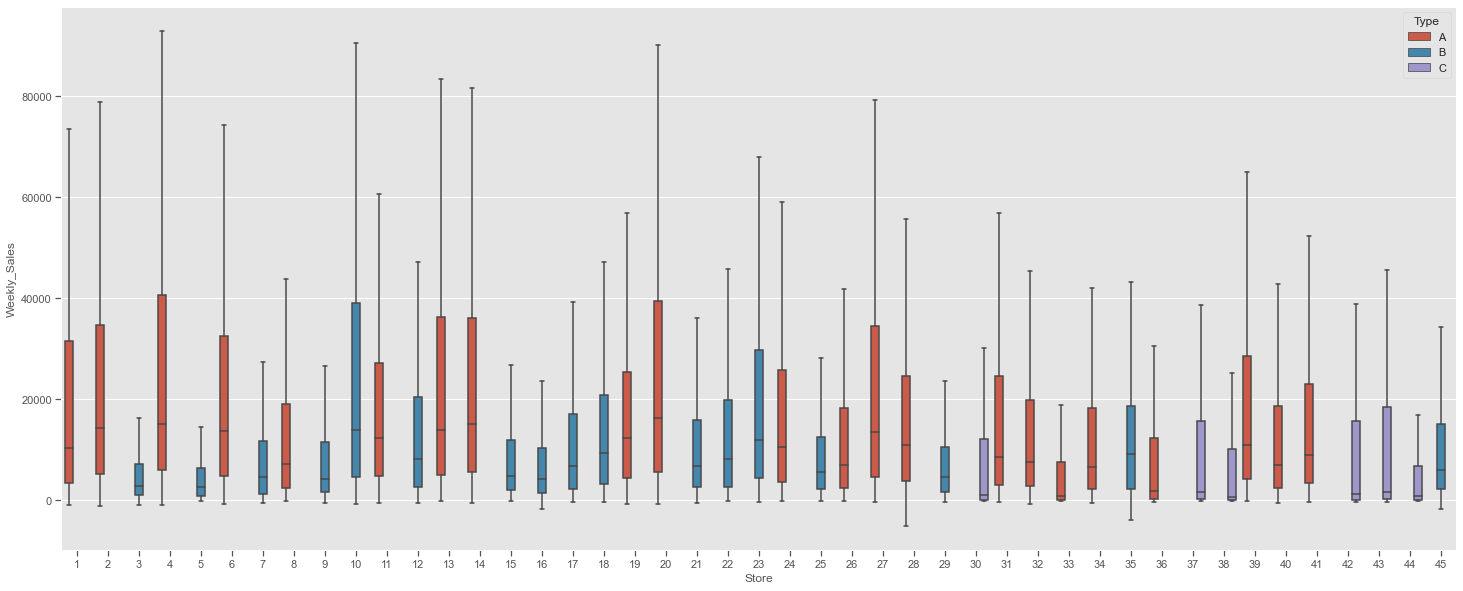

In [32]:
f, ax = plt.subplots(figsize=(25,10))

sns.boxplot(x='Store',y='Weekly_Sales',data=data,hue='Type',showfliers=False)

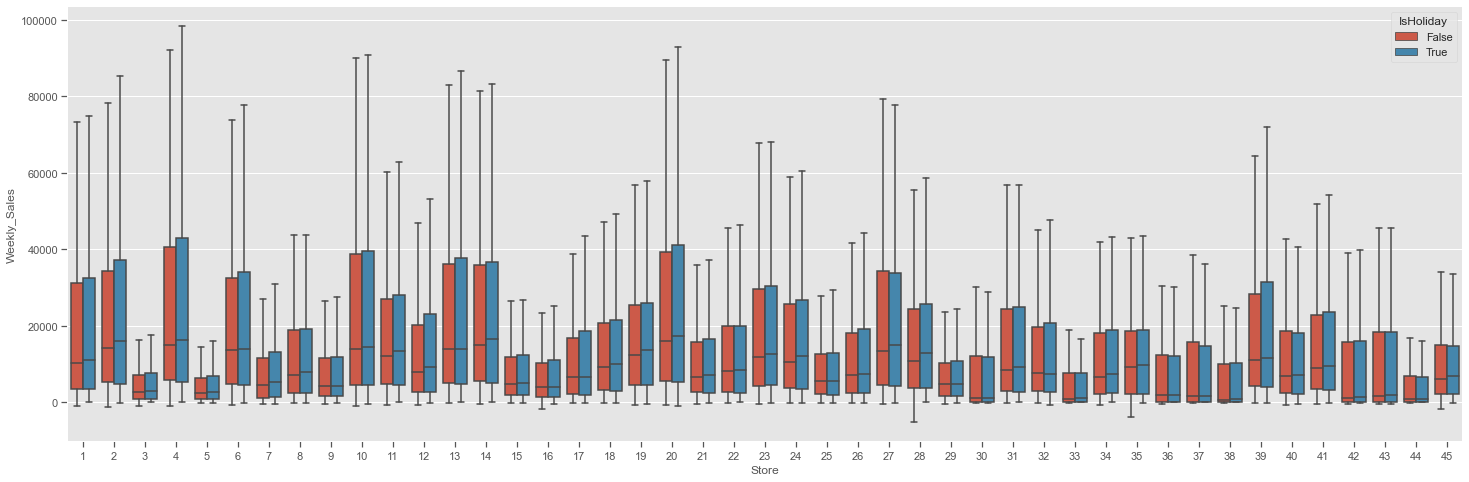

In [33]:
data = pd.concat([train['Store'],train['Weekly_Sales'],train['IsHoliday']],axis='columns')

f, ax = plt.subplots(figsize=(25,8))

fig = sns.boxplot(x='Store',y='Weekly_Sales',data=data,showfliers=False,hue='IsHoliday')


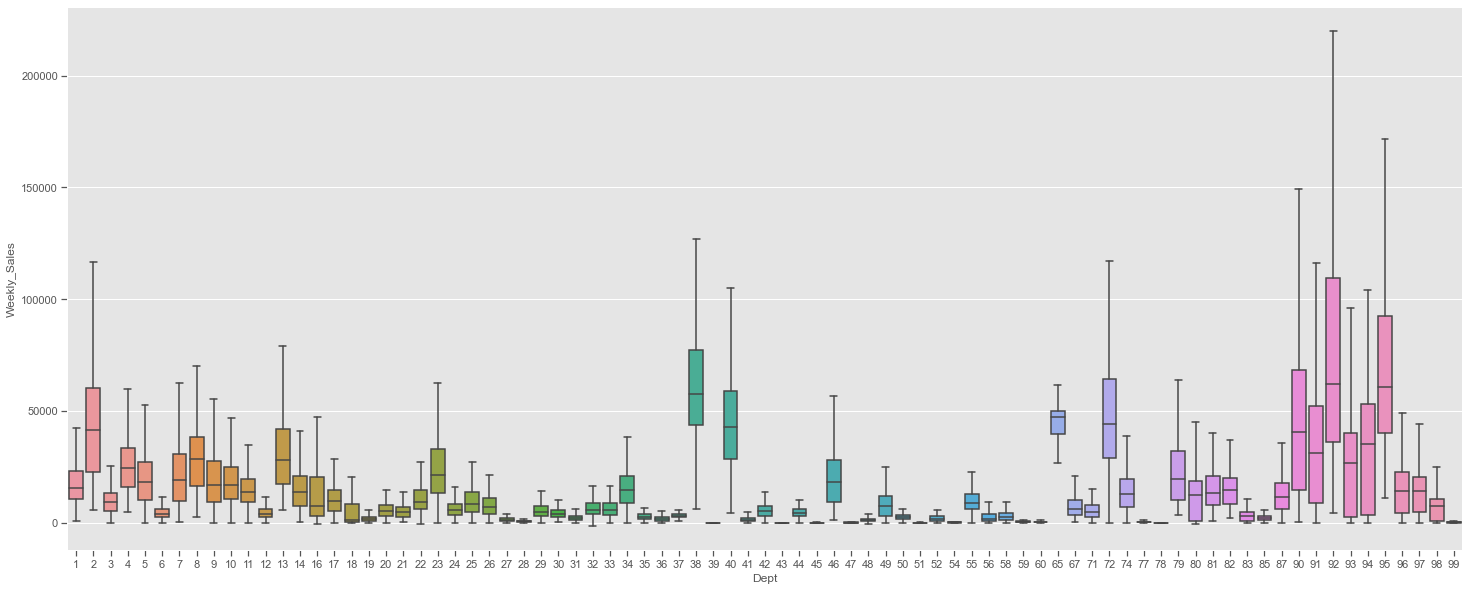

In [34]:
data = pd.concat([train['Dept'], train['Weekly_Sales'], train['Type']], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=data, showfliers=False)

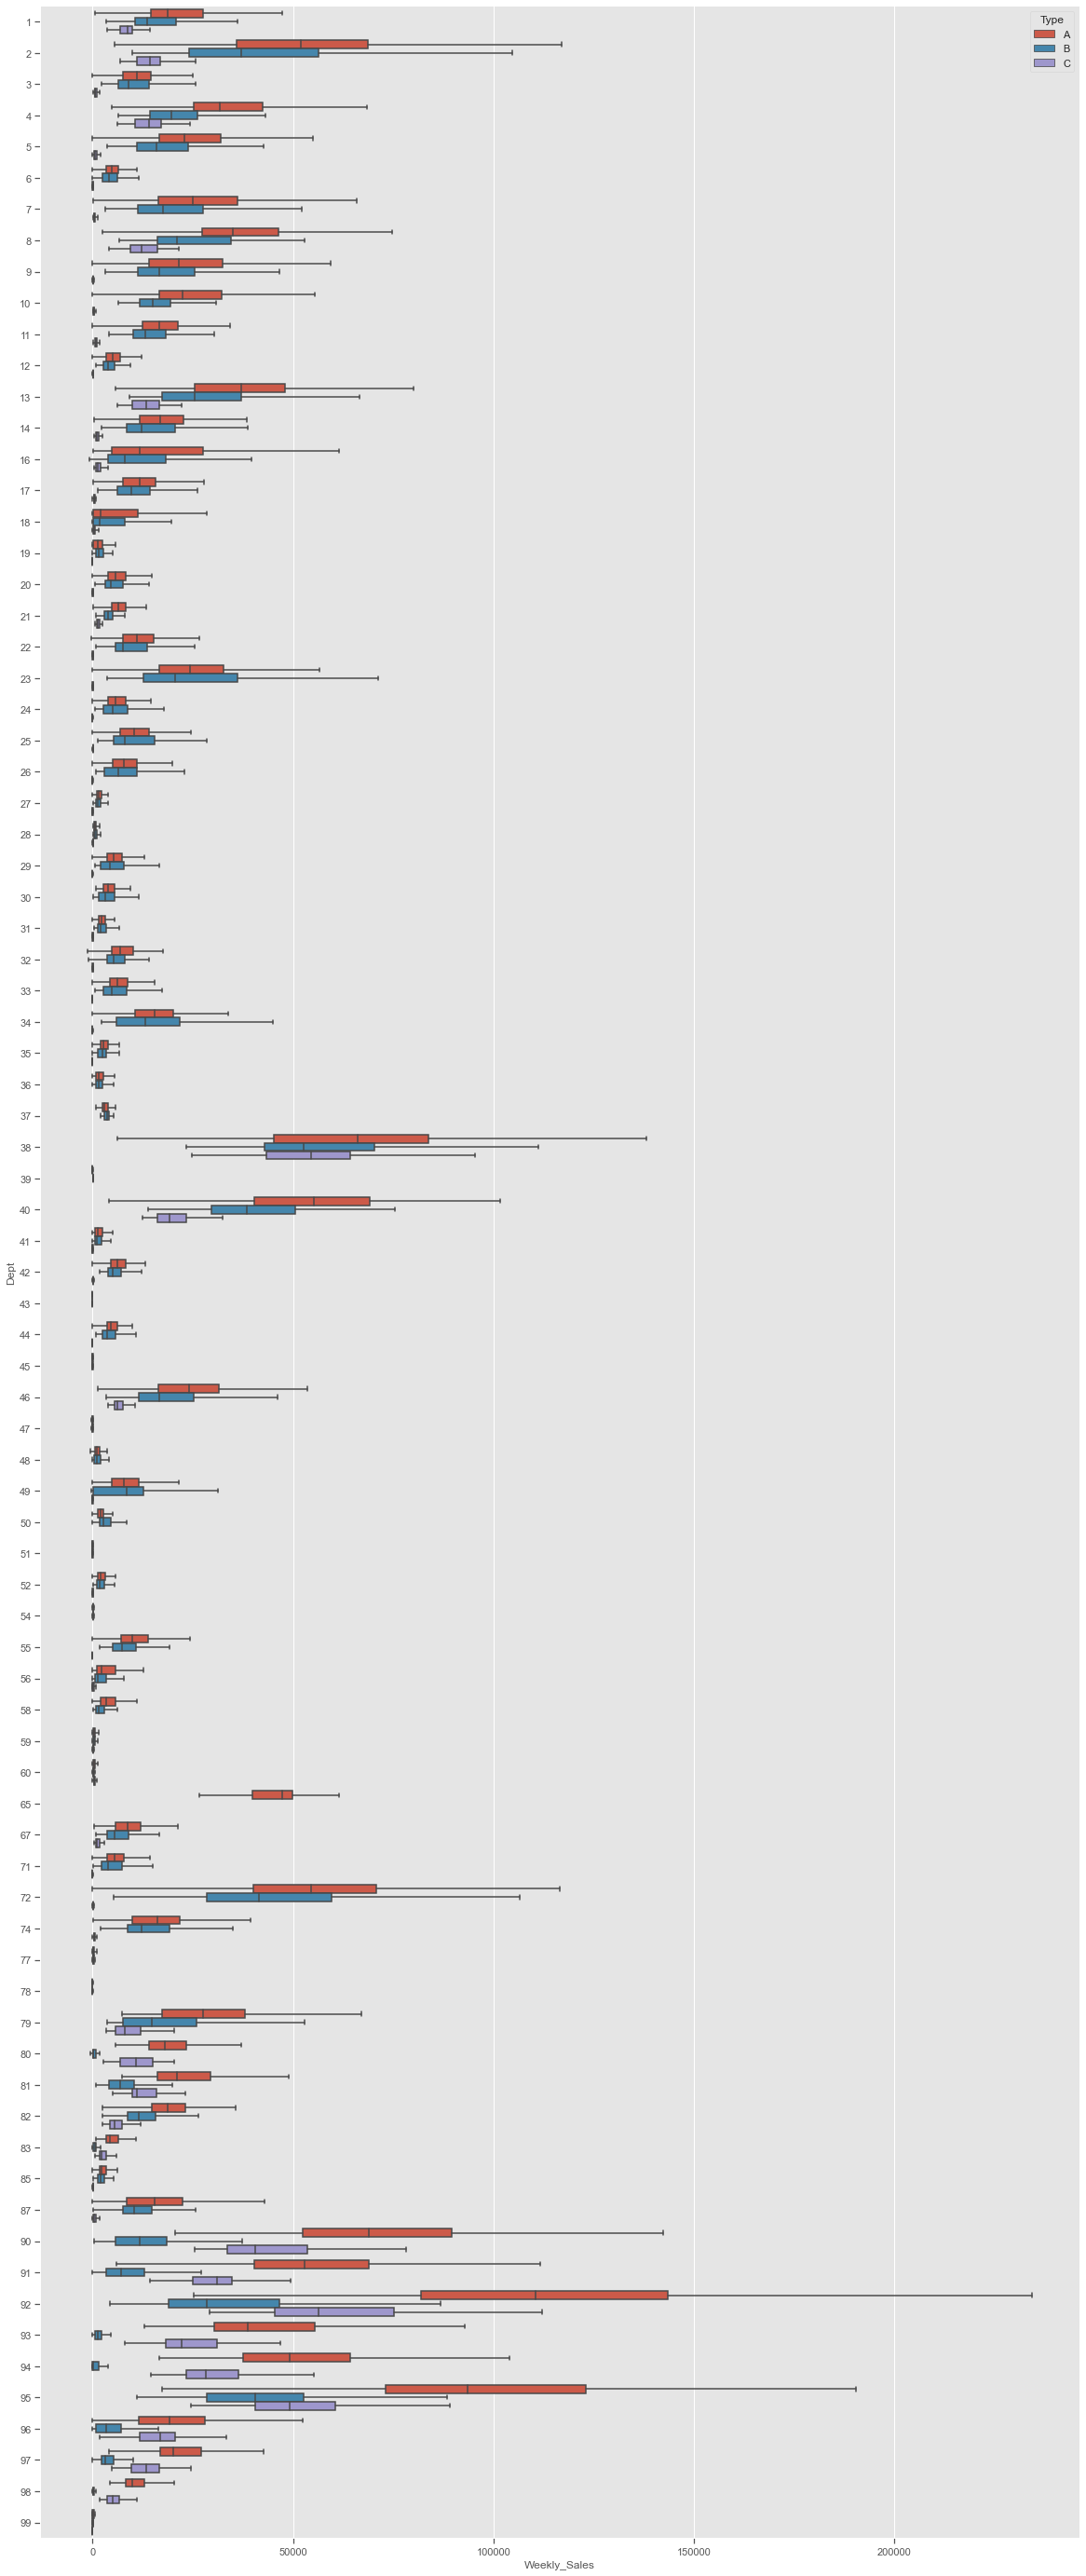

In [35]:
data = pd.concat([train['Dept'], train['Weekly_Sales'], train['Type']], axis=1)
f, ax = plt.subplots(figsize=(20, 50))
fig = sns.boxplot(y='Dept', x='Weekly_Sales', data=data, showfliers=False, hue="Type",orient="h") 

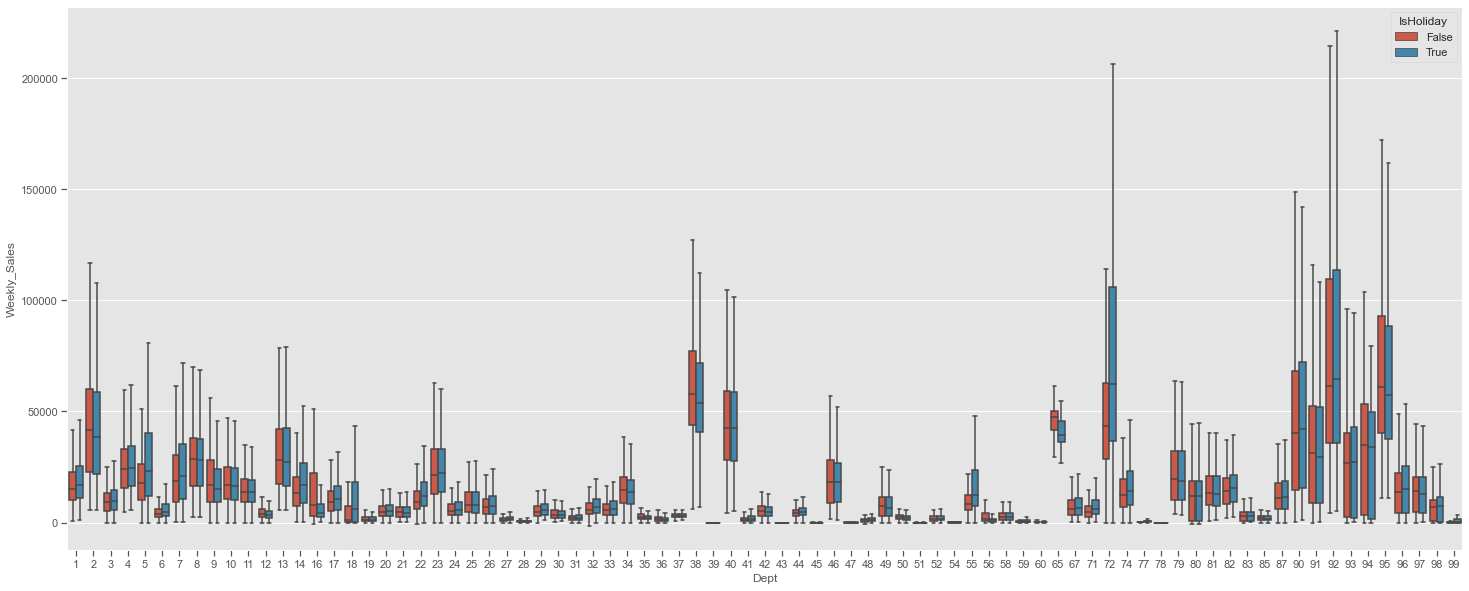

In [36]:
data = pd.concat([train['Dept'], train['Weekly_Sales'], train['IsHoliday']], axis=1)

f, ax = plt.subplots(figsize=(25, 10))

fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=data, showfliers=False, hue="IsHoliday")

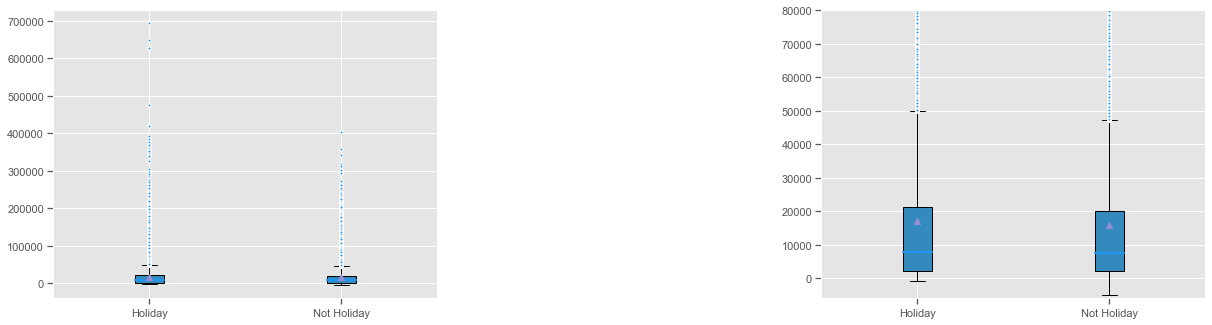

In [39]:
plt.style.use('ggplot')

fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

sales_holiday = train[['IsHoliday','Weekly_Sales']]

target=[sales_holiday.loc[sales_holiday['IsHoliday']==True, 'Weekly_Sales'],sales_holiday.loc[sales_holiday['IsHoliday']==False, 'Weekly_Sales']]
labels=['Holiday','Not Holiday']

medianprop={'color':'#2196F3',
            'linewidth': 2,
            'linestyle':'-'}

flierprop={'color' : '#EC407A',
          'marker' : 'o',
          'markerfacecolor': '#2196F3',
          'markeredgecolor':'white',
          'markersize' : 3,
          'linestyle' : 'None',
          'linewidth' : 0.1}

axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)

axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)

axes[1].set_ylim(-6000,80000)

plt.show()

In [41]:
print(train[train['IsHoliday']==True]['Weekly_Sales'].describe().round(1))
print()
print(train[train['IsHoliday']==False]['Weekly_Sales'].describe().round(1))

count     29661.0
mean      17035.8
std       27222.0
min        -798.0
25%        2078.5
50%        7947.7
75%       21189.2
max      693099.4
Name: Weekly_Sales, dtype: float64

count    391909.0
mean      15901.4
std       22330.7
min       -4988.9
25%        2079.8
50%        7590.0
75%       20131.2
max      406988.6
Name: Weekly_Sales, dtype: float64


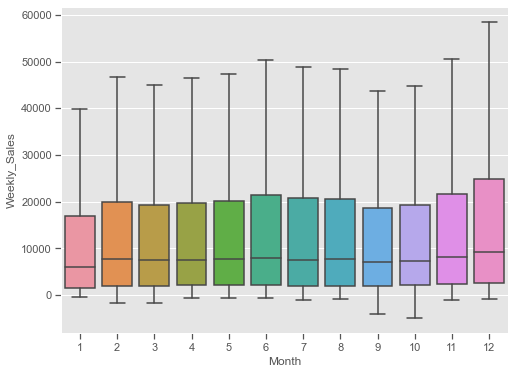

In [44]:
data = pd.concat([train['Month'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data, showfliers=False)

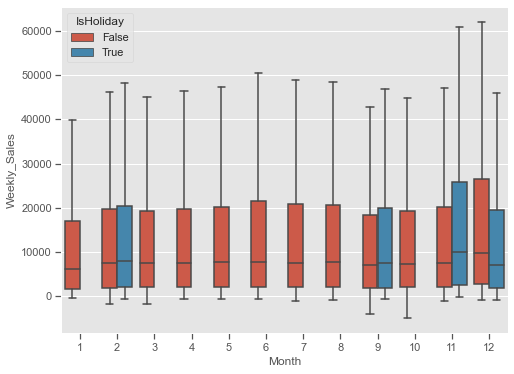

In [45]:
data = pd.concat([train['Month'], train['Weekly_Sales'],train['IsHoliday']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data, showfliers=False, hue='IsHoliday')

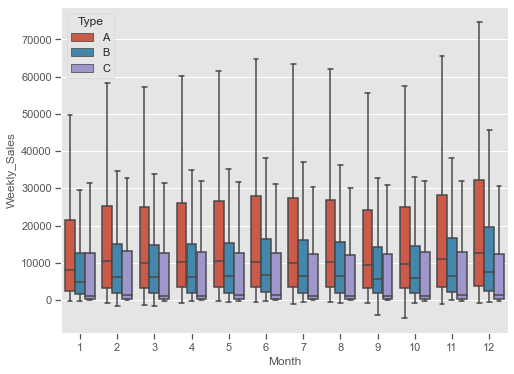

In [47]:
data = pd.concat([train['Month'], train['Weekly_Sales'],train['Type']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data, showfliers=False, hue='Type')

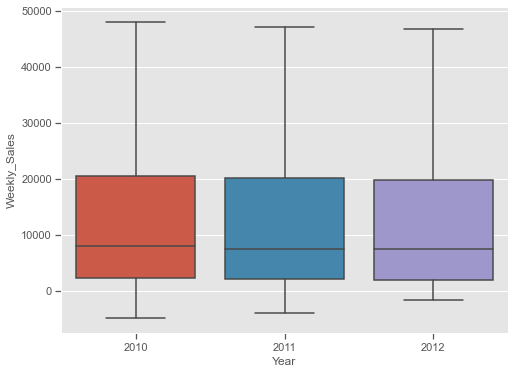

In [48]:
data = pd.concat([train['Year'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Year', y="Weekly_Sales", data=data, showfliers=False)

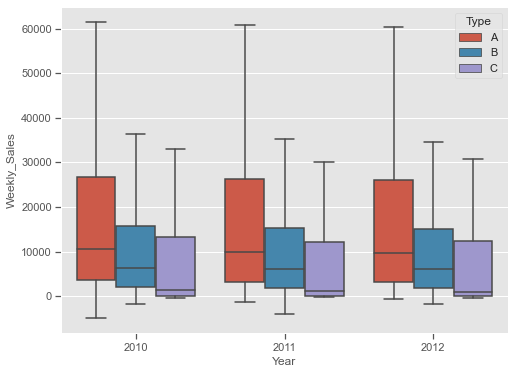

In [49]:
data = pd.concat([train['Year'], train['Weekly_Sales'], train['Type']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Year', y="Weekly_Sales", data=data, showfliers=False,hue='Type')

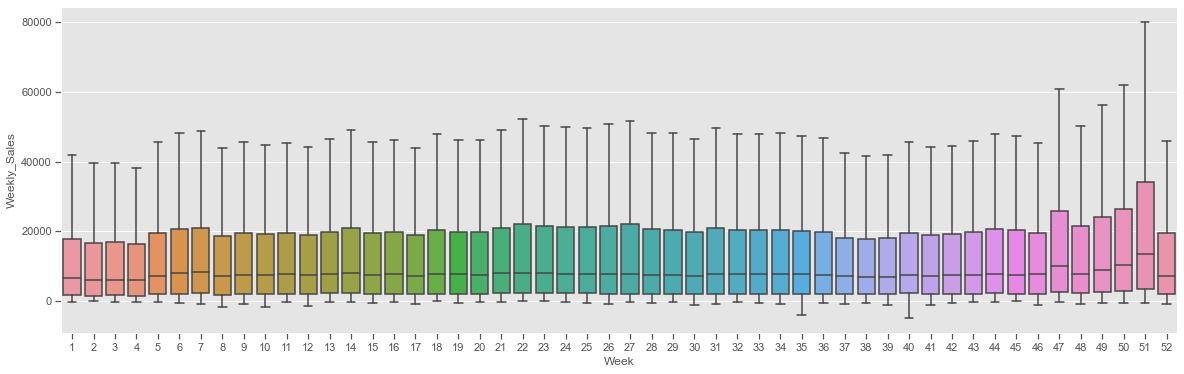

In [50]:
data = pd.concat([train['Week'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Week', y="Weekly_Sales", data=data, showfliers=False)

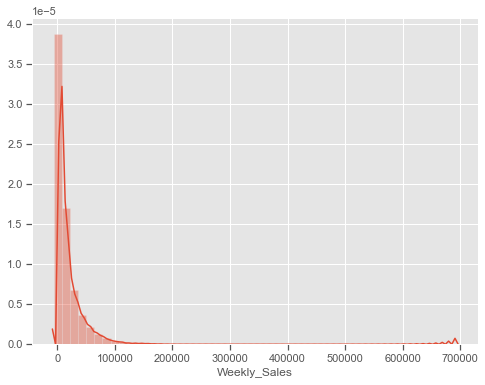

In [51]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['Weekly_Sales'])

In [52]:
print("Skewness: ", train['Weekly_Sales'].skew()) #skewness
print("Kurtosis: ", train['Weekly_Sales'].kurt()) #kurtosis

Skewness:  3.2620081854656657
Kurtosis:  21.49128990832619


In [53]:
train['Weekly_Sales'].min()

-4988.94

In [57]:
from scipy import stats
from scipy.stats import norm 
import warnings 
warnings.filterwarnings('ignore') #ignore warnings
import numpy as np # linear algebra

import gc

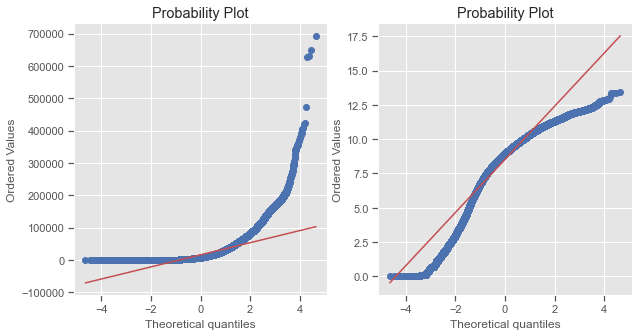

In [58]:
fig = plt.figure(figsize = (10,5))

fig.add_subplot(1,2,1)
res = stats.probplot(train.loc[train['Weekly_Sales']>0,'Weekly_Sales'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(train.loc[train['Weekly_Sales']>0,'Weekly_Sales']), plot=plt)

In [59]:
train.describe()['Weekly_Sales']

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

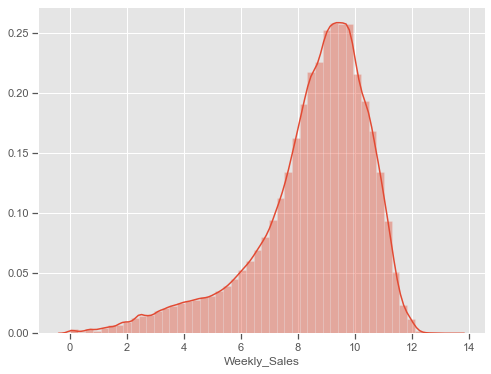

In [60]:
train_over_zero=train[train['Weekly_Sales']>0]
train_below_zero=train[train['Weekly_Sales']<=0]
sales_over_zero = np.log1p(train_over_zero['Weekly_Sales'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(sales_over_zero)